In [1]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Salary Analysis for Data Roles
Methodology
1. Evaluate median salary for top 6 data roles
2. Find median salary per skill for data analysts
3. Visualize highest paying skills + most demanded skills

In [2]:
# Filter for US & MY data, dropping null rows for salary
df_us = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg']).copy()
df_my = df[(df['job_country'] == 'Malaysia')].dropna(subset = ['salary_year_avg']).copy()

## US data

In [3]:
# Find the top 6 jobs that appear in the df
job_titles = df_us['job_title_short'].value_counts().index[0:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
# Filter df to only include observations from the top 6 data jobs
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]
df_us_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [5]:
# Sort top 6's median salary in descending order
us_joborder = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

C:\Users\zachwong\AppData\Local\Temp\ipykernel_20872\3065180160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_us_top6, x = 'salary_year_avg', y = 'job_title_short', order = us_joborder, palette = 'viridis', legend = False)


(0.0, 600000.0)

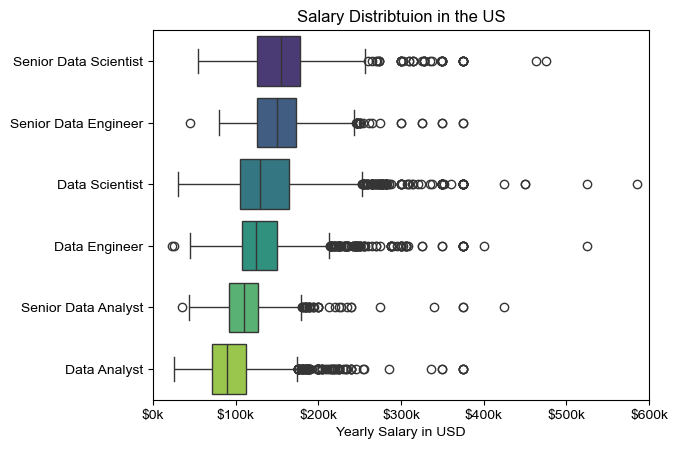

In [6]:
# Plotting time with boxplot
sns.boxplot(data = df_us_top6, x = 'salary_year_avg', y = 'job_title_short', order = us_joborder, palette = 'viridis', legend = False)
sns.set_theme(style = 'ticks')

# Customization
plt.title('Salary Distribtuion in the US')
plt.xlabel('Yearly Salary in USD')
plt.ylabel('')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim()

## MY data

In [7]:
# Find the top 6 jobs that appear in the df
job_titles = df_my['job_title_short'].value_counts().index[0:6].tolist()
job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Senior Data Engineer',
 'Senior Data Analyst',
 'Machine Learning Engineer']

In [8]:
# Filter df to only include observations from the top 6 data jobs
df_my_top6 = df_my[df_my['job_title_short'].isin(job_titles)]
df_my_top6.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,"[python, r, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
8643,Senior Data Engineer,"Senior Engineer, Data Analytics",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-10 14:22:12,False,False,Malaysia,year,79200.0,NaN,Western Digital,"[python, c#, sql, assembly]","{'programming': ['python', 'c#', 'sql', 'assem..."
12462,Data Scientist,"Scientist 2, Data Science","Petaling Jaya, Selangor, Malaysia",via Ai-Jobs.net,Full-time,False,Malaysia,2023-05-26 13:17:06,False,False,Malaysia,year,50400.0,NaN,Western Digital,"[python, sas, sas, javascript, aws, redshift, ...","{'analyst_tools': ['sas', 'spss'], 'cloud': ['..."
15296,Data Scientist,"Scientist 1, Data Science",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-01-05 13:43:52,False,False,Malaysia,year,50400.0,NaN,Western Digital,"[sql, javascript, python, r, java, matlab, aws...","{'cloud': ['aws'], 'libraries': ['hadoop'], 'o..."
21523,Data Analyst,"Data Analyst (Customer Service Industry, Manda...",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-06-15 13:31:41,False,False,Malaysia,year,111175.0,NaN,OKX,"[tableau, excel, flow]","{'analyst_tools': ['tableau', 'excel'], 'other..."


In [9]:
# Sort top 6's median salary in descending order
my_joborder = df_my_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

C:\Users\zachwong\AppData\Local\Temp\ipykernel_20872\759226292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_my_top6, x = 'salary_year_avg', y = 'job_title_short', order = us_joborder, palette = 'viridis', legend = False)


(44743.75, 169181.25)

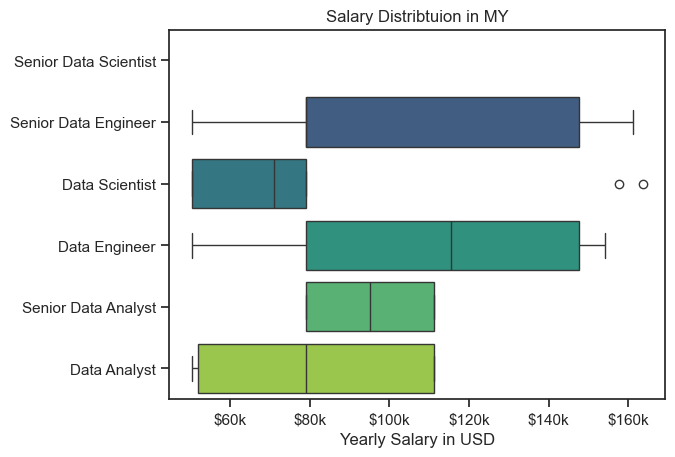

In [10]:
# Plotting with boxplot
sns.boxplot(data = df_my_top6, x = 'salary_year_avg', y = 'job_title_short', order = us_joborder, palette = 'viridis', legend = False)
sns.set_theme(style = 'ticks')

# Customization
plt.title('Salary Distribtuion in MY')
plt.xlabel('Yearly Salary in USD')
plt.ylabel('')
#plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim()

# Investigate Median Salary vs Skill for Data Analyst

In [11]:
# Filter for US & MY data
df_us2 = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_my2 = df[(df['job_country'] == 'Malaysia') & (df['job_title_short'] == 'Data Analyst')].copy()

# dropping null rows for salary column
df_us2.dropna(subset = 'salary_year_avg', inplace = True)

In [12]:
# Explode skills list into individual rows
df_us2 = df_us2.explode('job_skills')
df_us2[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [13]:
# Find the top paying (salary) skills 
df_us_top10pay = df_us2.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)

df_us_top10pay = df_us_top10pay.head(10)
df_us_top10pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [14]:
# Find the most popular skills
df_us_topskills = df_us2.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_us_topskills = df_us_topskills.head(10)

# Reorder top skills based on highest median salary to lowest
df_us_topskills.sort_values(by = 'median', ascending = False, inplace=True)
df_us_topskills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


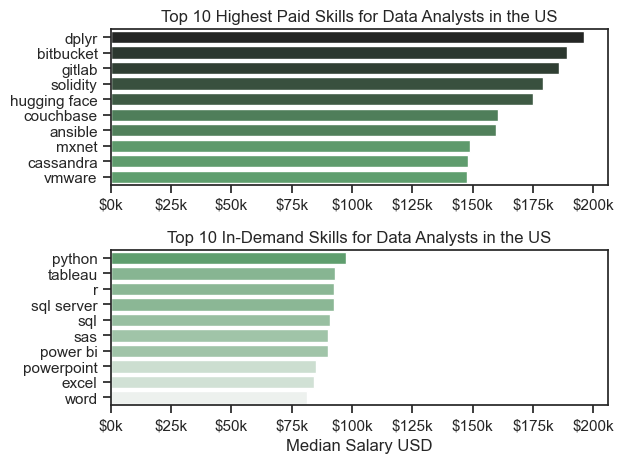

In [29]:
# Plotting time 
fig, ax = plt.subplots(2,1)

# sns.set_theme(style='ticks')

# Graph 1
sns.barplot(data=df_us_top10pay, x = 'median', y = df_us_top10pay.index, ax=ax[0], hue='median', palette='dark:g_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# Graph 2
sns.barplot(data=df_us_topskills, x = 'median', y = df_us_topskills.index, ax=ax[1], hue='median', palette='light:g')
ax[1].legend().remove()
ax[1].set_title('Top 10 In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))


ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

### MY Data

In [16]:
# dropping null rows for salary column
df_my2.dropna(subset = 'salary_year_avg', inplace = True)

In [17]:
# Explode skills list into individual rows
df_my2 = df_my2.explode('job_skills')
df_my2[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
7931,51014.0,python
7931,51014.0,r
7931,51014.0,sql
7931,51014.0,tableau
21523,111175.0,tableau


In [18]:
# Find the top paying (salary) skills 
df_my_top10pay = df_my2.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)

df_my_top10pay = df_my_top10pay.head(10)
df_my_top10pay

,count,median
job_skills,,
azure,1,111175.0
bigquery,1,111175.0
excel,5,111175.0
spark,1,111175.0
flow,2,87987.5
looker,3,79200.0
perl,1,79200.0
php,1,79200.0
sql,5,79200.0


In [19]:
# Find the most popular skills
df_my_topskills = df_my2.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_my_topskills = df_my_topskills.head(10)

# Reorder top skills based on highest median salary to lowest
df_my_topskills.sort_values(by = 'median', ascending = False, inplace=True)
df_my_topskills

,count,median
job_skills,,
excel,5,111175.0
azure,1,111175.0
bigquery,1,111175.0
flow,2,87987.5
sql,5,79200.0
tableau,5,79200.0
looker,3,79200.0
python,5,64800.0
r,2,57907.0


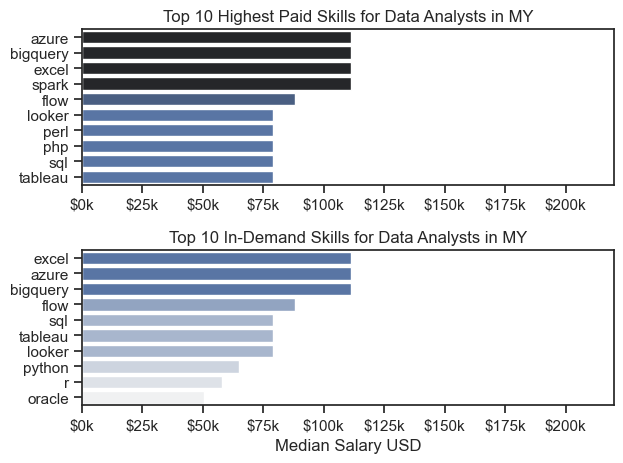

In [28]:
# Plotting time 
fig, ax = plt.subplots(2,1)

# sns.set_theme(style='ticks')

# Graph 1
sns.barplot(data=df_my_top10pay, x = 'median', y = df_my_top10pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in MY')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# Graph 2
sns.barplot(data=df_my_topskills, x = 'median', y = df_my_topskills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 In-Demand Skills for Data Analysts in MY')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

ax[0].set_xlim(0, 220000)
ax[1].set_xlim(0, 220000)

fig.tight_layout()